## Double Pendulum Using Langrangians


In [1]:
#import our packages
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from IPython.display import Image

## Have a fun display picture for reference

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

## Define our Double Pendulum Class

In [3]:
class DoublePendulum():
    """
    Our class for our double pendulum that uses Langrange instead of Hamilton equations
    
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        
    def dy_dt(self, t, y):
        """
        
        """
        theta1, z1, theta2, z2 = y
        
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        denom = (self.m1 + self.m2 * s**2)
        
        theta1_dot = z1
        z1_dot = (self.m1 *self.g * np.sin(theta2) * c \
                  - self.m2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                  - (self.m1 + self.m2) * self.g * np.sin(theta1)) / self.L1 / denom
        
        theta2_dot = z2
        z2_dot = ((self.m1 + self.m2) * (self.L1 * z1**2 * s - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c) \
                  + self.m2 *self.L2 * z2**2 * s * c) / self.L2 / denom
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0,
                  abserr=1.0e-10, relerr = 1.0e-10):
        """
        
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]),
                            y, t_eval=t_pts,
                            atol = abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y
        
        return theta1, theta1_dot, theta2, theta2_dot
    
    def calc_E(y):
        """
        
        """
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 + 2*L1*L2*th1d*th2d*np.cos(th1-th2))
        
        return T + V
    

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, color=None,
                linestyle=None, semilogy=False, loglog=False, ax=None):
    """
    
    """
    if ax is None:
        ax = plt.gca()
    
    if (semilogy):
        line, = ax.semilogy(x, y, label=label, color=color, linestyle=linestyle)
    
    elif (loglog):
        line, = ax.loglog(x, y, label=label, color=color, linestyle=linestyle)
    
    else:
        line, = ax.plot(x, y, label=label, color=color, linestyle=linestyle)
        
    if label is not None:
        ax.legend()
    if title is not None:
        ax.set_title(title)
    if axis_labels is not None:
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        
    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()
    return start_index, stop_index

In [6]:
#Labels for plot 
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

#Plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

#Initiate the DoublePendulum class 
dp1 = DoublePendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)

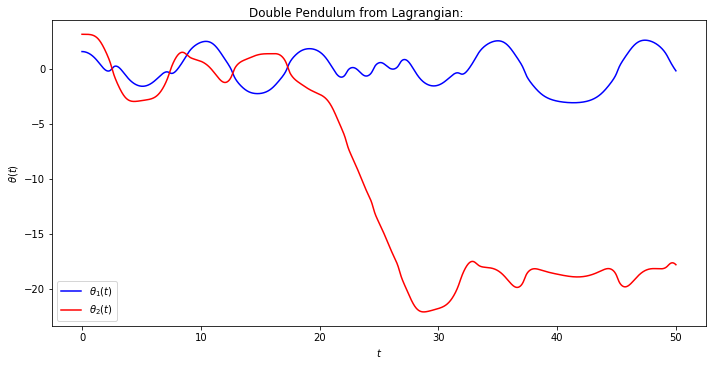

In [7]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian:'

#could add some more here

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'blue',
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'red',
            label = r'$\theta_2(t)$',
            ax = ax_a)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')

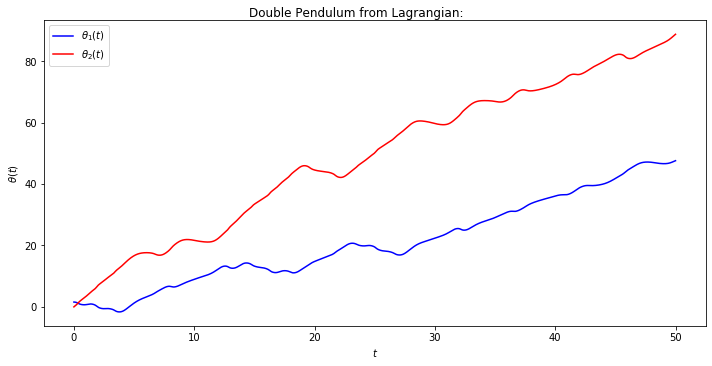

In [9]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = 0.
theta2_dot_0 = np.pi

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian:'

#could add some more here

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'blue',
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'red',
            label = r'$\theta_2(t)$',
            ax = ax_a)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')

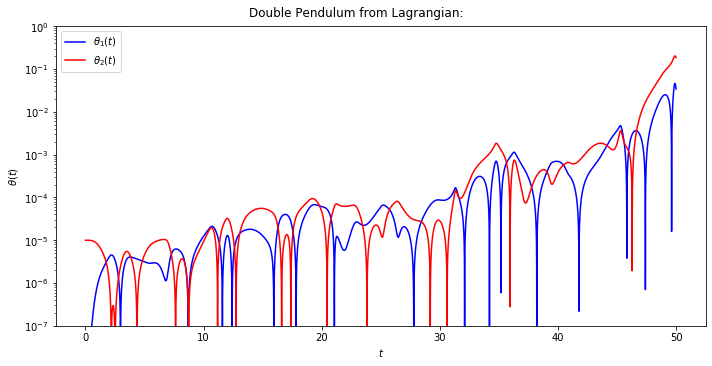

In [10]:
theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi/2.
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta1b_dot, theta2b, theta2b_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian:'

#could add some more here

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop]-theta1b[start : stop]),
            axis_labels = theta_vs_time_labels,
            color = 'blue', semilogy=True,
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop]-theta2b[start : stop]),
            axis_labels = theta_vs_time_labels,
            color = 'red', semilogy=True,
            label = r'$\theta_2(t)$',
            ax = ax_a)

ax_a.set_ylim(1.e-7, 1.)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')

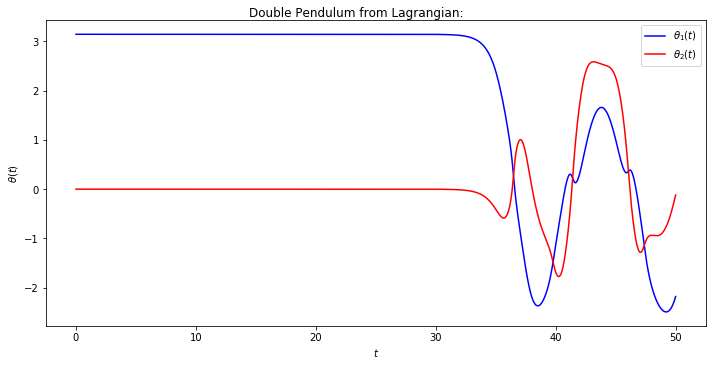

In [11]:
theta1_0 =  np.pi
theta1_dot_0 = 0.
theta2_0 = 0.
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian:'

#could add some more here

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'blue',
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'red',
            label = r'$\theta_2(t)$',
            ax = ax_a)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')

## Time to Animate the pendulum

In [12]:
from matplotlib import animation, rc
from IPython.display import HTML

In [13]:
def xy_coords(x0, y0, theta, L):
    """
    
    """
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x, y

In [14]:
%%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min

fig_anim = plt.figure(figsize=(5,5), num='Double Pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

####
x0, y0 = 0., 0.
pt0_anim, = ax_anim.plot(x0, y0,
                       'o', markersize=6,
                       color='black')
x1, y1 = xy_coords(x0, y0, theta1[0], dp1.L1)
pt1_anim, = ax_anim.plot(x1, y1,
                       'o', markersize=12,
                       color='blue')
ln1_anim, = ax_anim.plot([x0, x1], [y0, y1], color='blue', lw=3)

x2, y2 = xy_coords(x1, y1, theta2[0], dp1.L2)
pt2_anim, = ax_anim.plot(x2, y2,
                       'o', markersize=12,
                       color='blue')
ln2_anim, = ax_anim.plot([x1, x2], [y1, y2], color='blue', lw=3)

x1b, y1b = xy_coords(x0, y0, theta1b[0], dp1.L1)
pt1b_anim, = ax_anim.plot(x1b, y1b,
                       'o', markersize=12,
                       color='red')
ln1b_anim, = ax_anim.plot([x0, x1b], [y0, y1b], color='red', lw=3)

x2b, y2b = xy_coords(x1b, y1b, theta2b[0], dp1.L2)
pt2b_anim, = ax_anim.plot(x2b, y2b,
                       'o', markersize=12,
                       color='red')
ln2b_anim, = ax_anim.plot([x1b, x2b], [y1b, y2b], color='red', lw=3)

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [15]:
def animate_pen(i):
    """
    
    """
    i_skip = 2 * i
    
    x0, y0 = 0., 0.
    pt0_anim.set_data(x0, y0)
    
    x1, y1 = xy_coords(x0, y0, theta1[i_skip], dp1.L1)
    pt1_anim.set_data(x1, y1)
    ln1_anim.set_data([x0, x1], [y0, y1])
    x2, y2 = xy_coords(x0, y0, theta2[i_skip], dp1.L2)
    pt2_anim.set_data(x2, y2)
    ln2_anim.set_data([x1, x2], [y1, y2])
    
    x1b, y1b = xy_coords(x0, y0, theta1b[i_skip], dp1.L1)
    pt1b_anim.set_data(x1b, y1b)
    ln1b_anim.set_data([x0, x1b], [y0, y1b])
    x2b, y2b = xy_coords(x1b, y1b, theta2b[i_skip], dp1.L2)
    pt2b_anim.set_data(x2b, y2b)
    ln2b_anim.set_data([x1b, x2b], [y1b, y2b])
    
    return (pt0_anim, pt1_anim, ln1_anim, ln2_anim, pt1b_anim, pt2b_anim, ln1b_anim, ln2b_anim)

In [16]:
frame_interval = 20.
frame_number = 1001
anim = animation.FuncAnimation(fig_anim,
                              animate_pen,
                              init_func = None,
                              frames = frame_number,
                              interval = frame_interval,
                              blit = True,
                              repeat = False)

In [17]:
HTML(anim.to_jshtml())